In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy
import random

## 주기함수

$f(x+p) = f(x)$

x에 대하여 -p 만큼 수평이동 하였을 때 원래 함수의 그래프와 일치하는 함수, 주기는 $p$

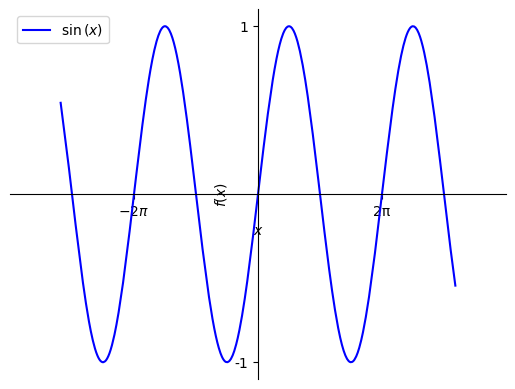

In [56]:
# 사인함수의 주기를 그래프로

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)


x = sympy.Symbol('x')
f = sympy.sin(x)
p1 = sympy.plot(f, xlim=(4*-sympy.pi, 4*sympy.pi), line_color='blue', show=False, legend=True)


fig, ax = plt.subplots(ncols=1)
move_sympyplot_to_axes(p1, ax)
plt.xticks([2*-np.pi,2*np.pi],['$-2π$','2π'])
plt.yticks([1,-1],[1,-1])

plt.show()


# 주기는 2pi

---

# 푸리에 급수

임의의 주기를 갖는 어떤 주기함수 f(x)는 삼각급수로 표현 가능함


$f(x) = a_0 + \sum\limits_{n=1} ^{\infty} (a_n\,cos\,nx + b_n\,sin\,nx)$ 

- 푸리에 계수 $a_0$ 구하기

- $a_n$ , $b_n$ 구하기

> 예제. 다음 함수의 푸리에 급수를 구하라

$f(x) = \begin{cases}
    -1\,(-\pi<x<0)\\
    1\quad(0<x<\pi)\\
  \end{cases}$,
  
$f(x+2\pi) = f(x)$

In [114]:
# a0 구하기

f = -1
g = 1

a0 = 1/(2*sympy.pi) * ((sympy.integrate(f,(x,-sympy.pi,0))) + (sympy.integrate(g,(x,0,sympy.pi))))
a0

0

In [115]:
# an 구하기
# n은 모든 자연수에 해당하므로, 1~1000까지의 임의의 자연수를 추첨하였음 (어차피 뭘 넣어도 기함수라 0 나옴)

f = -1
g = 1
n = random.randint(1, 1000)

an = (1/(sympy.pi) * (sympy.integrate(f * sympy.cos(n*x),(x,-sympy.pi,0)))) + (1/(sympy.pi) * (sympy.integrate(g * sympy.cos(n*x),(x,0,sympy.pi))))
an

0

In [129]:
# bn과 테일러 급수의 1-5 값 구하기
# n은 모든 자연수에 해당하고, 우함수이기 때문에 유효한 값이 나오기 때문에, n을 1,2,3,4,5까지 대입시킴

f = -1
g = 1
sum = []
for i in range(1,6):
    n = i

    bn = (1/(sympy.pi) * (sympy.integrate(f * sympy.sin(n*x),(x,-sympy.pi,0)))) + (1/(sympy.pi) * (sympy.integrate(g * sympy.sin(n*x),(x,0,sympy.pi))))
    # 이전 과정에서 a0과 an은 0이라 소거되어지고, 남은 bn sin nx을 계산해주면..
    tayler = bn * sympy.sin(n*x)
    if tayler != 0:
        sum.append(tayler)
    else:
        pass

print(sum)


[4*sin(x)/pi, 4*sin(3*x)/(3*pi), 4*sin(5*x)/(5*pi)]


In [62]:
# 간단하게 Sympy로 구하기

import sympy

x = sympy.symbols('x')
sympy.fourier_series(2*sympy.Heaviside(x)-1, (x,-sympy.pi,sympy.pi)).simplify()

FourierSeries(2*Heaviside(x) - 1, (x, -pi, pi), (0, SeqFormula(0, (_n, 1, oo)), SeqFormula(-(2*Piecewise((0, Eq(_n, 0)), (-1/_n, True)) - 2*Piecewise((0, Eq(_n, 0)), (-cos(_n*pi)/_n, True)))*sin(_n*x)/pi, (_n, 1, oo))))